In [10]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import spline

import ROOT
from ROOT import gROOT, gSystem, TFile, TGraphAsymmErrors, TH1, TF1, TFitResultPtr
import rootnotes
import rootprint

import plottingFunctions as pF
from astropy import units as u



default colormap is now  ds9b


In [40]:
import pandas
#pandas.
import root_numpy

home = os.path.expanduser("~")
crabdir = home + "/VERITAS/Crab/"
gcdir = home + "/VERITAS/GC/results/"
plotdir = home + "/Dropbox/GalacticCenter/plots/comparison/"


u.Unit("(TeV/cm2s)")
#tev.in_units("erg")

ValueError: '(TeV/cm2s)' did not parse as unit: Syntax error parsing unit '(TeV/cm2s)'

In [32]:
specPlot = pF.spectrumPlotter()
help(u.Unit)
#help(pandas.read_csv)

Help on class Unit in module astropy.units.core:

class Unit(NamedUnit)
 |  The main unit class.
 |  
 |  There are a number of different ways to construct a Unit, but
 |  always returns a `UnitBase` instance.  If the arguments refer to
 |  an already-existing unit, that existing unit instance is returned,
 |  rather than a new one.
 |  
 |  - From a string::
 |  
 |      Unit(s, format=None, parse_strict='silent')
 |  
 |    Construct from a string representing a (possibly compound) unit.
 |  
 |    The optional `format` keyword argument specifies the format the
 |    string is in, by default ``"generic"``.  For a description of
 |    the available formats, see `astropy.units.format`.
 |  
 |    The optional ``parse_strict`` keyword controls what happens when an
 |    unrecognized unit string is passed in.  It may be one of the following:
 |  
 |       - ``'raise'``: (default) raise a ValueError exception.
 |  
 |       - ``'warn'``: emit a Warning, and return an
 |         `Unrecogni

('SgrA_disp5t_v255_okay-obs-4tel_medium_both_s6', '.root')
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.218
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.191
You might consider updating your normalization energy and rerunning.


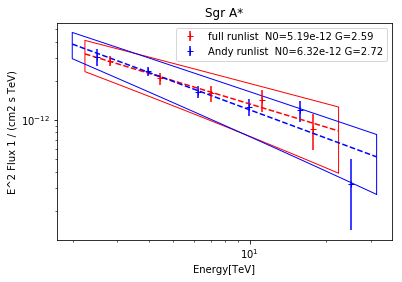

In [11]:

spectrum = pF.spectrumPlotter()


filename = home + "/VERITAS/GC/results/SgrA_disp5t_v255_okay-obs-4tel_medium_both_s6.root"
print os.path.splitext(os.path.basename(filename))


spectrum.readVEGASs6Root(filename)
spectrum.plotSpectrum(label="full runlist") #xmin=0.1
spectrum.readVEGASs6Root(home+"/VERITAS/GC/results/stage6_Andy_SgrA_spectrum_SgrA_s6.root")
spectrum.plotSpectrum(label="Andy runlist", c='blue')

plt.title("Sgr A*")
plt.savefig(home+"/Downloads/specPlot.png")

You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.185
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.184
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.185
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.183
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.185
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 1.000
Yet the decorrelation energy is at  0.185
You might consider updating your normalization energy and rerunning.


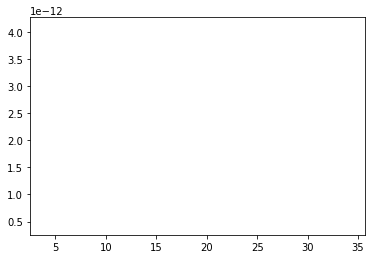

In [30]:
fileone = "SgrA_disp5t_medium_okay_stg5-v255_EA-v255_s6.root"
files = '''SgrA_disp5t_medium_okay_stg5-v254_EA-v255_s6.root
SgrA_disp5t_medium_okay_stg5-v255_EA-v254_s6.root
SgrA_disp5t_medium_okay_stg5-v255_EA-v255_Andy-bin-fine4_s6.root'''
#SgrA_v255_disp5t_Andy_spectrum_newEA_s6.root

for f in files.splitlines():
    
    base, ext = os.path.splitext(f)
    pathname = gcdir + f
    #print pathname
    
    specPlt = pF.spectrumPlotter()
    specPlt.readVEGASs6Root(gcdir + fileone)
    specPlt.plotSpectrum(label='control', c='red')
    
    specPlt.readVEGASs6Root(pathname)
    specPlt.plotSpectrum(label=base, c='blue')
    
    plt.title(base)
    plt.savefig(plotdir + base + ".png")
    plt.cla()

    #print raw_input("Press any key to continue..")
    #sys.stdin.read(1)
    
    
    
    

You have attempted to calculate the decorrelation energy but you don't 
have a covariance matrix - rerun to produce this.
You have attempted to calculate the decorrelation energy but you don't 
have a covariance matrix - rerun to produce this.


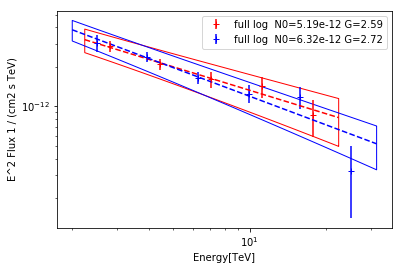

In [4]:
sp2 = pF.spectrumPlotter()
sp2.readVEGASLog(home+"/Dropbox/GalacticCenter/log/stage6/SgrA_disp5t_v255_okay-obs-4tel_medium_both_stage6.txt")
sp2.plotSpectrum(label="full log")
sp2.readVEGASLog(home+"/Dropbox/GalacticCenter/log/stage6/stage6_Andy_SgrA_spectrum.txt")
sp2.plotSpectrum(label="full log", c='blue')

# larger butterfly due to covariance being present in ROOT file but not log 
#help(plt.errorbar)

You are giving the normalization at 3.000
Yet the decorrelation energy is at  2.776
You might consider updating your normalization energy and rerunning.
You are giving the normalization at 3.000
Yet the decorrelation energy is at  4.921
You might consider updating your normalization energy and rerunning.


AttributeError: 'TObject' object has no attribute 'GetSpectrumGraph'

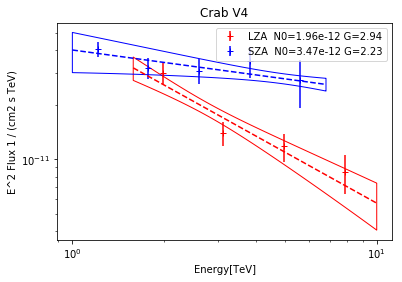

In [17]:
crabdir = home + "/VERITAS/Crab"
for array in ('V4',):
    sp = pF.spectrumPlotter()
    plt.title("Crab "+array)
    fn = crabdir + "/Crab_LZA_disp5t_"+array+"_spectrum_fit1-10TeV_s6.root"
    sp.readVEGASs6Root(fn)
    sp.plotSpectrum(label='LZA')
    fn = crabdir + "/Crab_SZA_std_"+array+"_spectrum_fit1-10TeV_s6.root"
    sp.readVEGASs6Root(fn)
    sp.plotSpectrum(label='SZA', c='blue')
    fn = crabdir + "/Crab_LZA_disp5t_V6_spectrum_newEA_s6.root"
    sp.readVEGASs6Root(fn)
    sp.plotSpectrum(label='newEA', c='orange')

In [6]:
%%rootprint
import root_numpy

#root_numpy.hist2array
filename = home + "/VERITAS/GC/results/SgrA_disp5t_v255_okay-obs-4tel_medium_both_s6.root"

s6F = TFile(filename, "read")
if not s6F.IsOpen():
    print "Could not open file! ", rootfilename
specAn = s6F.Get("Spectrum/VASpectrumAnl")
specGraph = specAn.GetSpectrumGraph()
xaxis = specGraph.GetXaxis()
#specHist = specAn.GetSpectrumHist()
specHist = specAn.GetRebinnedSpectrumHist()

alpha = specAn.GetAlphaHist()
sig = specAn.GetSigmaHist()
alpha = specAn.GetRebinnedAlphaHist()
#specAn.Rebin(2)

xaxis = specGraph.GetXaxis()

alphaArray = root_numpy.hist2array(alpha)
print alphaArray
sig = root_numpy.hist2array(sig)
print sig

print specGraph.GetN()
print len(alphaArray)
print specHist.GetNbinsX()

print type(specAn)
#specAn.MakeSpectrumGraph()

s6F.Close()


[ 0.13775393  0.1377109   0.1377109   0.1377109   0.1377109 ]
[ 0.]
7
5
5
<class 'plottingFunctions.VASpectrumAnl'>



In [7]:
%%rootprint
vegasPath = os.path.expandvars("$VEGAS")
#vegasPath = "/home/mbuchove/Downloads"

# test with ROOT6
#gROOT.Reset()
gSystem.Load("libTreePlayer.so")
gSystem.Load("libPhysics.so")
gSystem.Load(vegasPath + "/common/lib/libSP24sharedLite.so")
gSystem.Load(vegasPath + "/resultsExtractor/lib/libStage6shared.so")
gSystem.AddIncludePath("-Wno-unused -Wno-shadow -Wno-unused-parameter")
gROOT.ProcessLine(".L " + vegasPath + "/common/include/VACommon.h")
gROOT.ProcessLine(".include " + vegasPath + "/common/include/")
gROOT.ProcessLine(".include " + vegasPath + "/resultsExtractor/include/")
gROOT.ProcessLine(".include " + vegasPath + "/cfitsio/include/")
    

#vacomm = VASpectrumAnl()
    
try:
    vegas_class = VACommon()
except:
    print "Unexpected error:", sys.exc_info()[0]
    _use_vegas = False
else:
    _use_vegas = True
    
    
print _use_vegas


Unexpected error: <type 'exceptions.NameError'>
False
reloading /home/mbuchove/VERITAS/base-ROOT5/VEGAS-v255/common/include/VACommon.h  0
reloading VAUsefulConversions.h  0
reloading cfloat  0
reloading float.h  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/TArchiveFile/P010_TZIPFile.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/TVirtualStreamerInfo/P010_TStreamerInfo.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/ROOT@@Math@@Minimizer/P010_Minuit2Minimizer.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/ROOT@@Math@@Minimizer/P020_TMinuitMinimizer.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/ROOT@@Math@@Minimizer/P030_GSLMinimizer.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/ROOT@@Math@@Minimizer/P040_GSLNLSMinimizer.C  0
reloading /home/mbuchove/VERITAS/base-ROOT5/ROOT-install/etc/plugins/ROOT@@Math@@Minimizer/P050_GSLSimAn

In [8]:
print spectrum.energyUnits.to_string()
energyUnits = u.TeV
sedUnits = (energyUnits * u.s**-1 * u.cm * u.cm)
print sedUnits.to_string()

TeV
cm2 TeV / s


In [8]:
rebin = 4
binning="""
0.45
0.55
0.65
0.75
0.85
0.95
1.1
1.3
1.5
"""

lastnum = None 
for num in binning.splitlines():
    try:
        num = float(num)

        if lastnum != None:
            delta = ( num - lastnum ) / 4 
            print lastnum
            for i in range(1, rebin):
                print lastnum + i*delta
        
    except ValueError:
        continue 
    
    lastnum = num
    
print num


0.45
0.475
0.5
0.525
0.55
0.575
0.6
0.625
0.65
0.675
0.7
0.725
0.75
0.775
0.8
0.825
0.85
0.875
0.9
0.925
0.95
0.9875
1.025
1.0625
1.1
1.15
1.2
1.25
1.3
1.35
1.4
1.45
1.5


In [9]:
def get_hist_points(h):
    """return E[TeV], flux[1/TeV*m^2*s], and flux_err as lists"""
    x, y, yerr = [], [], []
    for pt in range(1, h.GetNbinsX()+1):
        tmpX, tmpY = ROOT.Double(0), ROOT.Double(0)
        #h.GetPoint(pt, tmpX, tmpY)
        x.append(h.GetBinCenter(pt))
        y.append(h.GetBinContent(pt))
        yerr.append(h.GetBinError(pt))
        
    #print np.array(x), np.array(y), np.array(yerr)
    return np.power(10, np.array(x)), np.array(y), np.array(yerr)
# get_hist_points



In [10]:
xlab = specHist.GetXaxis().GetTitle()
ylab = specHist.GetYaxis().GetTitle()
print xlab

E, flux, flux_err = get_hist_points(rebinned_specHist)
print E
print flux
print flux_err

print type(specGraph)

E  [ Log10(TeV) ]


NameError: name 'rebinned_specHist' is not defined

In [ ]:
#%%rootprint
tf1 = specGraph.GetFunction("fFitFunction")
fitnorm = tf1.GetParameter(0)
fitindex = tf1.GetParameter(1)
normenergy = tf1.GetParameter(2)

r = specGraph.Fit(tf1, "S") #TFitResultPtr
#for i in range(3):
#    print tf1.GetParameter(i)
    
cov = r.GetCovarianceMatrix() #TMatrixTSym<double>
cov.Print()

var_norm = cov(0, 0)
var_index = cov(1, 1)
cov_normindex = cov(0, 1) # == (1, 0)

print np.sqrt(var_norm)
print np.sqrt(var_index)
print cov_normindex

#covarr = cov.GetMatrixArray()


In [ ]:
npoints     = specGraph.GetN()

x2, y2 = [], []
y_err = []
for i in range(npoints):
    tmpX, tmpY = ROOT.Double(0), ROOT.Double(0)
    specGraph.GetPoint(i, tmpX, tmpY)
    x2.append(tmpX)
    y2.append(tmpY)
    y_err.append((specGraph.GetErrorYlow(i), specGraph.GetErrorYhigh(i)))
    
x2 = np.array(x2)
y2 = np.array(y2)
y_err = np.array(y_err)

print x2
print y2
print y_err

In [ ]:
%%rootprint
s6F.ls()
cov.Print()


In [ ]:
ar = np.ndarray((2,5))
print ar
l1 = [1]*5
l2 = [2]*5

print np.asarray((l1, l2))
